# Maximising Film Profitability

In [1]:
import pandas as pd 
df = pd.read_csv("movie_metadata.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   object 
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [3]:
df.describe()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [4]:
df = df[['movie_title','color','language','title_year','country','genres','duration','plot_keywords'
          ,'content_rating','aspect_ratio','imdb_score','num_user_for_reviews'
          ,'num_critic_for_reviews','movie_facebook_likes','movie_imdb_link',
          'num_voted_users','budget','gross','facenumber_in_poster',
          'director_name','director_facebook_likes','actor_1_name',
         'actor_1_facebook_likes','actor_2_name','actor_2_facebook_likes','actor_3_name',
         'actor_3_facebook_likes','cast_total_facebook_likes']]

# Data wrangling and cleaning

In [5]:
nan_indexes = df[df.isnull().any(axis=1)].index
df.drop(nan_indexes, inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                3756 non-null   object 
 1   color                      3756 non-null   object 
 2   language                   3756 non-null   object 
 3   title_year                 3756 non-null   float64
 4   country                    3756 non-null   object 
 5   genres                     3756 non-null   object 
 6   duration                   3756 non-null   float64
 7   plot_keywords              3756 non-null   object 
 8   content_rating             3756 non-null   object 
 9   aspect_ratio               3756 non-null   float64
 10  imdb_score                 3756 non-null   float64
 11  num_user_for_reviews       3756 non-null   float64
 12  num_critic_for_reviews     3756 non-null   object 
 13  movie_facebook_likes       3756 non-null   int64

# Changing feature name

In [7]:
columns = {"title_year" : "release_date"}

df.rename(columns=columns,inplace=True)

# Handling dublicates

In [8]:
print(df.duplicated("movie_title").any())
sum(df.duplicated("movie_title"))

True


101

In [9]:
pd.unique(df[df.duplicated("movie_title")].movie_title)

array(['Hero\xa0', 'Stealing Harvard\xa0', 'Death at a Funeral\xa0',
       'Big Fat Liar\xa0', 'The Texas Chain Saw Massacre\xa0',
       'The Fog\xa0', 'The Unborn\xa0', 'The Full Monty\xa0',
       'The Possession\xa0', 'Dodgeball: A True Underdog Story\xa0',
       'Crossroads\xa0', 'Home\xa0', 'Dredd\xa0', 'O\xa0', 'Juno\xa0',
       'Fantastic Four\xa0', 'Carrie\xa0', 'Hercules\xa0',
       'Chasing Liberty\xa0', 'Halloween\xa0',
       'Teenage Mutant Ninja Turtles\xa0',
       'A Nightmare on Elm Street\xa0', 'Trance\xa0', 'The Watch\xa0',
       'The Tourist\xa0', 'Goosebumps\xa0', 'Snatch\xa0',
       'The Day the Earth Stood Still\xa0', 'Snakes on a Plane\xa0',
       'Disturbia\xa0', 'Aloha\xa0', 'Brothers\xa0', 'Cinderella\xa0',
       'The Fast and the Furious\xa0', 'The Jungle Book\xa0',
       'Eddie the Eagle\xa0', 'Clash of the Titans\xa0',
       'Side Effects\xa0', 'Footloose\xa0', 'My Soul to Take\xa0',
       'The Gift\xa0', 'Alice in Wonderland\xa0', 'House of Wa

In [10]:
df.drop_duplicates("movie_title",keep="first",inplace=True,ignore_index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                3655 non-null   object 
 1   color                      3655 non-null   object 
 2   language                   3655 non-null   object 
 3   release_date               3655 non-null   float64
 4   country                    3655 non-null   object 
 5   genres                     3655 non-null   object 
 6   duration                   3655 non-null   float64
 7   plot_keywords              3655 non-null   object 
 8   content_rating             3655 non-null   object 
 9   aspect_ratio               3655 non-null   float64
 10  imdb_score                 3655 non-null   float64
 11  num_user_for_reviews       3655 non-null   float64
 12  num_critic_for_reviews     3655 non-null   object 
 13  movie_facebook_likes       3655 non-null   int64

# Creating new features

In [11]:
gross_to_budget =  df.gross.values /  df.budget.values
df["gross_to_budget"] = gross_to_budget

In [12]:
overall_likes = df.director_facebook_likes + df.cast_total_facebook_likes + df.movie_facebook_likes 
df["overall_likes"] = overall_likes

In [13]:
df["made_or_lost"] = df["gross_to_budget"].apply(lambda x: 'made' if x > 1 else 'lost')

In [14]:
df.head(5)


,movie_title,color,language,release_date,country,genres,duration,plot_keywords,content_rating,aspect_ratio,...,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,gross_to_budget,overall_likes,made_or_lost
0,Evil Dead II,Color,English,1987.0,USA,Comedy|Fantasy|Horror|Thriller,37.0,cabin|cabin in the woods|demon|evil dead|woods,X,1.85,...,Ted Raimi,634.0,Dan Hicks,328.0,Kassie Wesley DePaiva,199.0,1347,1.645290,1347.0,made
1,Flame and Citron,Color,Danish,2008.0,Denmark,Drama|History|Thriller|War,45.0,danish|double agent|nazi|nazi occupation|resis...,Not Rated,2.35,...,Lars Mikkelsen,573.0,Thure Lindhardt,197.0,Christian Berkel,104.0,1098,0.003225,1126.0,lost
2,Taxi to the Dark Side,Color,English,2007.0,USA,Crime|Documentary|War,53.0,afghanistan|detainee|guantanamo bay|taxi|torture,R,1.85,...,Alex Gibney,141.0,George W. Bush,125.0,Greg D'Agostino,23.0,313,0.274661,454.0,lost
3,Winnie the Pooh,Color,English,2011.0,USA,Adventure|Animation|Comedy|Family|Musical,63.0,disney|owl|rabbit|sequel|tiger,G,1.85,...,Craig Ferguson,759.0,Robert Lopez,73.0,Huell Howser,69.0,1002,0.889572,1017.0,lost
4,Timecrimes,Color,Spanish,2007.0,Spain,Horror|Mystery|Sci-Fi|Thriller,66.0,binoculars|hitchcockian|scissors|time machine|...,R,1.85,...,Karra Elejalde,123.0,Nacho Vigalondo,76.0,Bárbara Goenaga,36.0,239,0.014657,315.0,lost


# Handling outliers

In [15]:
def interquartile_range(series):
    gross_to_budget_Q1 = series.quantile(q=0.25)
    gross_to_budget_Q3 = series.quantile(q=0.75)
    return gross_to_budget_Q3 -gross_to_budget_Q1


gross_to_budget_IQR = interquartile_range(df["gross_to_budget"])
print(f"The interquartile-range of gross_to_budget is {gross_to_budget_IQR}")

The interquartile-range of gross_to_budget is 1.762726053240741


In [16]:
def IQR_outliers(series):
    Q1 = series.quantile(q=0.25)
    Q3 = series.quantile(q=0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    print(upper_bound)
    lower_outliers = series[series < lower_bound]
    upper_outliers = series[series > upper_bound]
    
    return lower_outliers.to_numpy(), upper_outliers.to_numpy()


lower_outliers, upper_outliers = IQR_outliers(df["gross_to_budget"])
print(f"The lower outliers of number of gross_to_budget are {lower_outliers}")
print(f"The upper outliers of number of gross_to_budget are {upper_outliers}")

4.8839482206018525
The lower outliers of number of gross_to_budget are []
The upper outliers of number of gross_to_budget are [9.39519504e+00 6.39320777e+00 1.28923628e+01 6.06800000e+01
 6.01808333e+00 1.92137467e+01 6.10017640e+01 9.67662712e+00
 7.86728000e+00 2.38095238e+01 5.25592775e+00 1.15379624e+01
 4.92610837e+00 2.34216857e+03 2.27578190e+02 5.22861700e+01
 2.91560000e+02 7.13921989e+00 7.81789182e+00 9.24627425e+01
 3.15373200e+01 5.32450550e+01 2.45071957e+01 7.19448553e+03
 5.36161667e+01 2.14745500e+01 1.78864911e+01 5.24329611e+01
 6.49068567e+00 1.60166732e+01 6.27761500e+00 1.81129290e+01
 1.45640270e+01 7.35855733e+00 5.34372267e+00 7.91052000e+01
 1.28535794e+01 1.36363636e+01 1.33399796e+01 2.27722528e+01
 1.52800000e+01 8.94611667e+00 3.24230769e+01 3.69427285e+02
 9.95404444e+00 2.38285714e+01 6.84642893e+00 4.90806667e+00
 5.96375000e+00 2.71566055e+03 4.07857257e+01 2.13780000e+01
 5.80147500e+00 5.38104133e+00 6.53592675e+00 1.01641880e+01
 1.14787520e+01 5.23

In [17]:
df= df[~df.gross_to_budget.isin(upper_outliers)]
print(len(df))

3301


The total number of rows removed after removing the outliers is 354 rows, leaving us with 3301 rows which is still enough to perform accurate analysis.

# Visualising distributions

1) Box and whisker plot, Which helps us visualise the distribution, skewness and symmetry of the data:

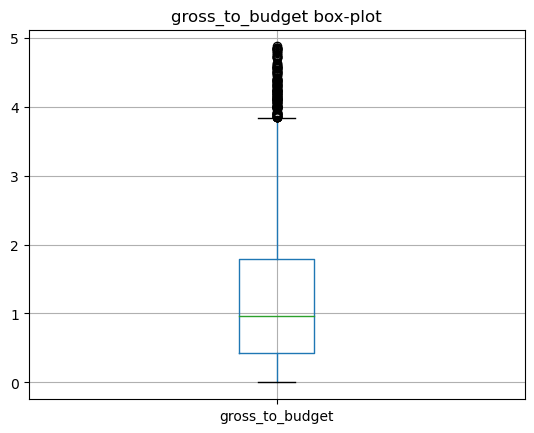

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 1)

df.boxplot(column="gross_to_budget",ax=axes)
axes.set_title('gross_to_budget box-plot')
    
fig.set_figwidth(fig.get_figwidth() )
fig.set_figheight(fig.get_figheight() )

2) Histogram and KDE plot, which gives us a view of the underlying frequency distribution for the data:

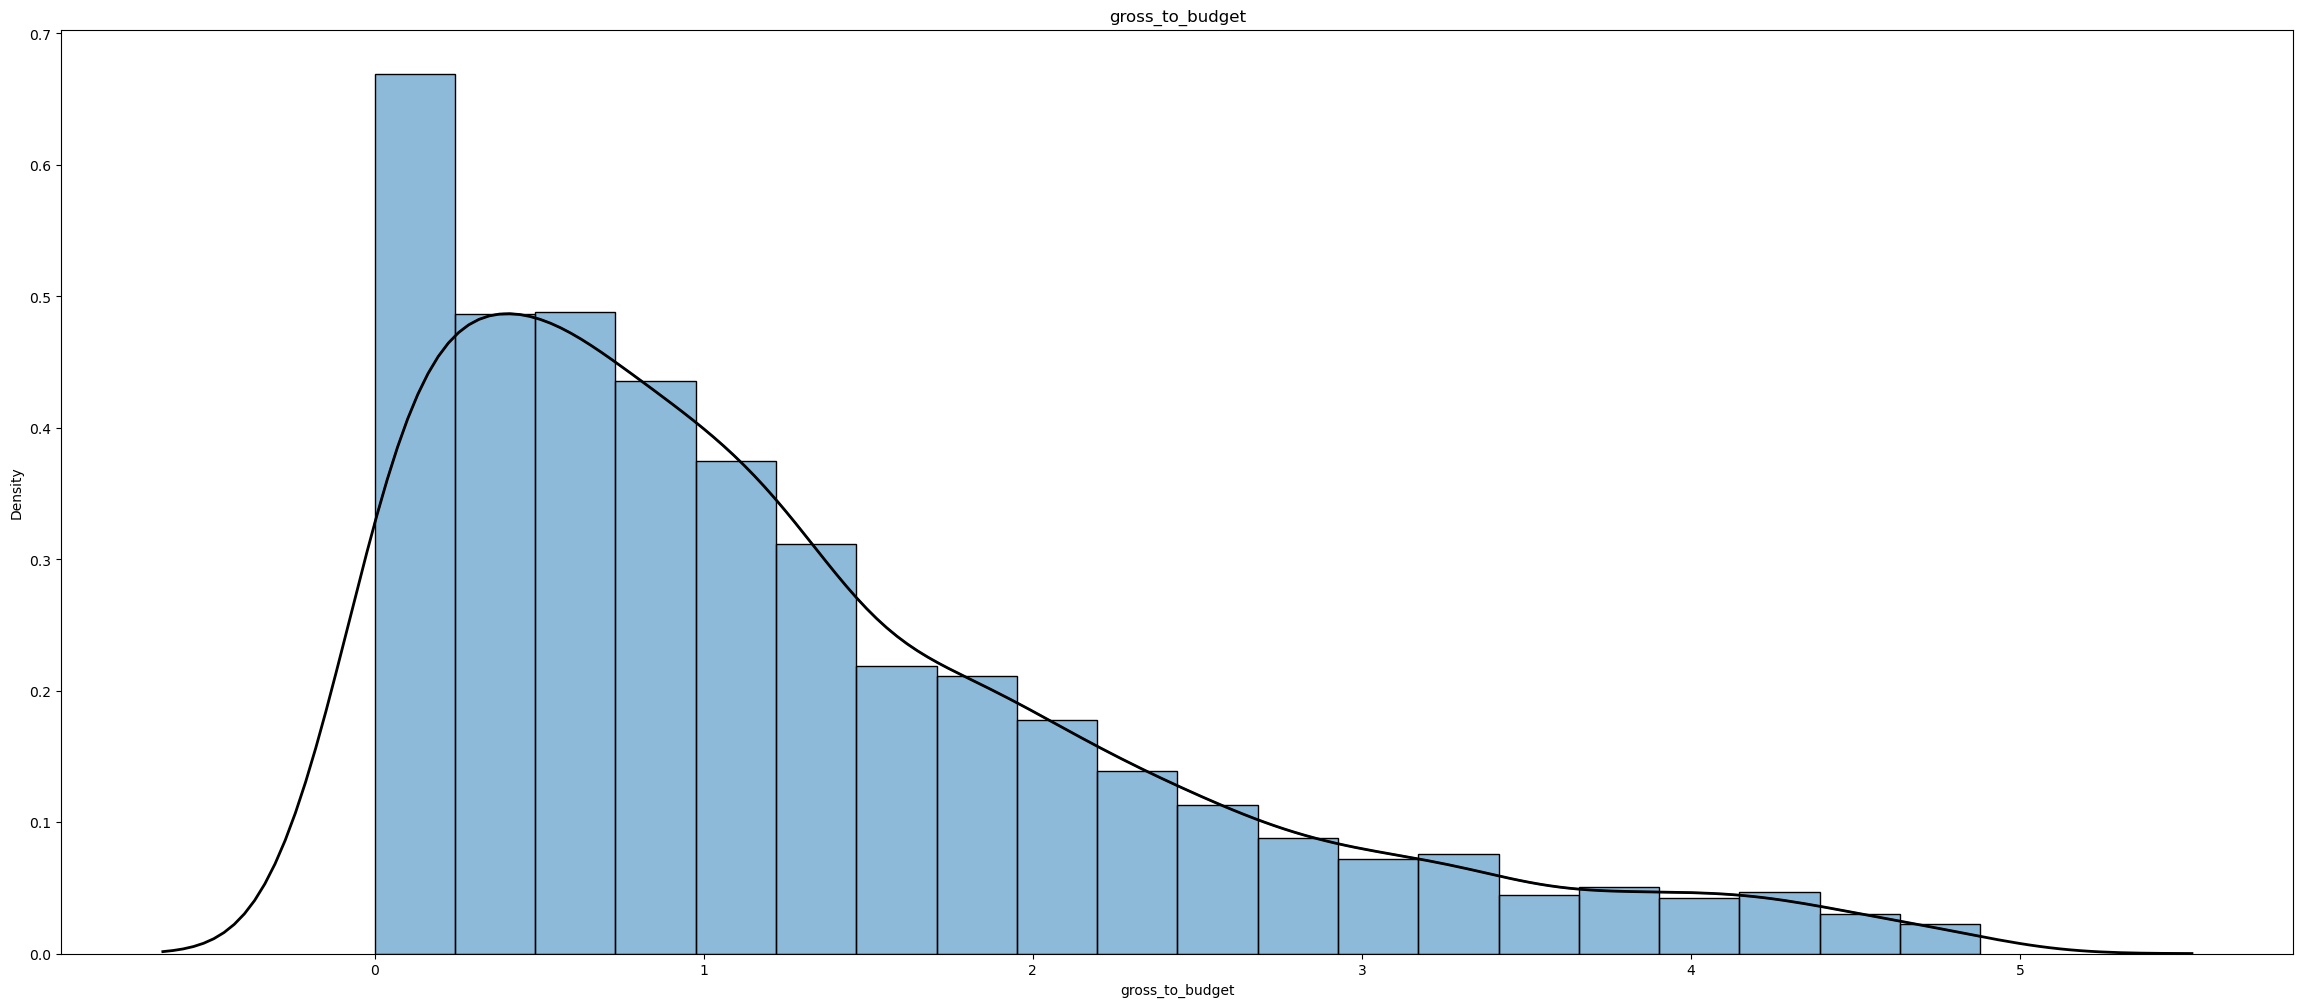

In [19]:
import seaborn as sns 

fig, axes = plt.subplots(nrows = 1, ncols = 1)


sns.histplot(data=df,x="gross_to_budget",ax=axes,kde=True, bins=20, stat="density")
sns.kdeplot(data=df,x="gross_to_budget",ax=axes,color="k", linewidth=2)
axes.set_title('gross_to_budget')
    

fig.set_figwidth(fig.get_figwidth() * 4.5)
fig.set_figheight(fig.get_figheight() * 2.5)

3) P-P plot, were the theoretical probability is plotted against the gross_to_budget sample probability:

Text(0.5, 0, 'theoretical probabilities')

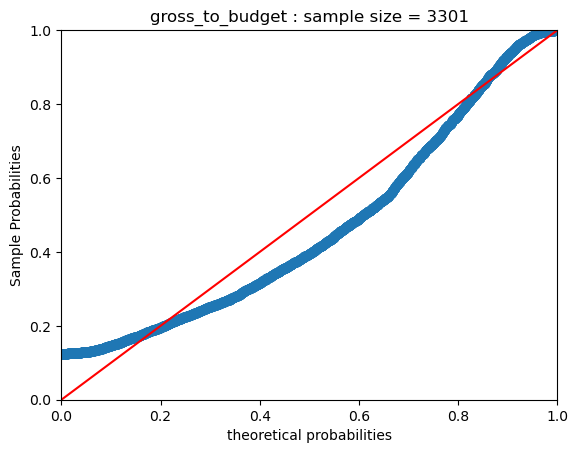

In [20]:
import statsmodels.api as sm 
from scipy.stats import norm

fig, axes = plt.subplots(nrows = 1, ncols = 1)

pp_x = sm.ProbPlot(df.gross_to_budget,dist=norm, fit=True)
pp_x.ppplot(line="45",ax=axes)
axes.set_title(f"gross_to_budget : sample size = {df['gross_to_budget'].count()}")
axes.set_xlabel("theoretical probabilities")

4) ECDF plot, were we test the empirical cumulative distribution function to the true cumulative distripution function of the distribution:


Text(0.5, 1.0, 'mean = 6.34135, sample size = 3301')

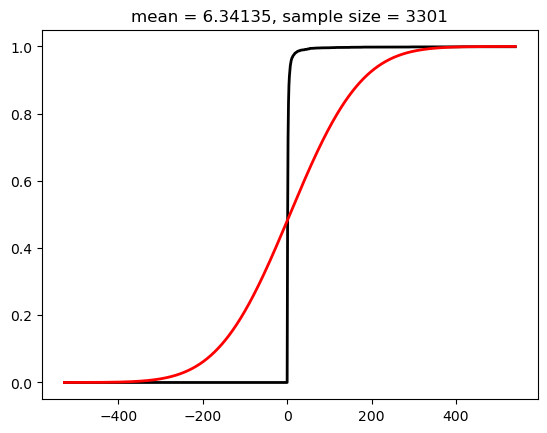

In [21]:
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np 

fig, axes = plt.subplots(nrows = 1, ncols = 1)

ecdf = ECDF(gross_to_budget)
    
mean = gross_to_budget.mean()
std = gross_to_budget.std(ddof=1)
    
xax = np.linspace(mean - 4*std,mean + 4*std,1001)
    
axes.plot(xax,ecdf(xax),c="k",lw=2)
axes.plot(xax,norm(loc=mean,scale=std).cdf(xax),c="r",lw=2)
    
axes.set_title(f"mean = {mean:.5f}, sample size = {df['gross_to_budget'].count()}")

K-squared test:

In [22]:
from scipy.stats import normaltest
_,p_value = normaltest(df['gross_to_budget'])
print(p_value)

3.1039071629521206e-116


The P-value that is very low, which means that the data is rejected as a Gaussian distribution regardless of any significance level that can be assigned.

### By observing the plots and the test above, it is clear that our data is not normally distributed (Gaussian).

# Bootstrapping

In [23]:
def bootstrap_diff_means(data_1,data_2,num_bootstraps=12000,tail="two"):
    m_1 = np.mean(data_1)
    m_2 = np.mean(data_2)
    v_1 = np.var(data_1, ddof=1)
    v_2 = np.var(data_2, ddof=1)
    n_1 = len(data_1)
    n_2 = len(data_2)
    se = np.sqrt(v_1/n_1 + v_2/n_2)
    t_stat = (m_1 - m_2)/se

    comb_m = (np.sum(data_1) + np.sum(data_2))/(n_1 + n_2)

    adj_col1 = data_1 - m_1 + comb_m
    adj_col2 = data_2 - m_2 + comb_m

    count = 0
    for _ in range(num_bootstraps):
        bs_1 = np.array([adj_col1[i] for i in np.random.randint(0,n_1,size=n_1)])
        bs_2 = np.array([adj_col2[i] for i in np.random.randint(0,n_2,size=n_2)]) 
        
        bs_m_1 = np.mean(bs_1)
        bs_m_2 = np.mean(bs_2)
        bs_v_1 = np.var(bs_1,ddof=1)
        bs_v_2 = np.var(bs_2,ddof=1)
        bs_se = np.sqrt(bs_v_1/n_1 + bs_v_2/n_2)
        
        bs_t_stat = (bs_m_1 - bs_m_2)/bs_se
        
        if tail == "two":
            if np.abs(bs_t_stat) >= np.abs(t_stat):
                count += 1
        elif tail == "less":
            if bs_t_stat <= t_stat:
                count += 1
        elif tail == "greater":
            if bs_t_stat >= t_stat:
                count += 1

    return m_1 - m_2, t_stat, (count+1)/(num_bootstraps+1)

A hypothesis test using bootstrapping will be conducted to compare the mean of "gross_to_budget" for movies with an IMDb score greater than or equal to 7 to those below 7. Significance level will be set at 1%:
\begin{align*}
\mathbf{H}_0 \quad &: \quad \mu_1 - \mu_2 = 0 \\
\mathbf{H}_1 \quad &: \quad \mu_1 - \mu_2 \gt 0
\end{align*}


In [24]:
alpha = 0.01
score_margin = 7
imdb_above_7 = df[df['imdb_score']>= score_margin ]
imdb_below_7 = df[df['imdb_score']< score_margin]
data_1 = imdb_above_7['gross_to_budget'].to_numpy()
data_2 = imdb_below_7['gross_to_budget'].to_numpy()

dbar, _, p_value_bs = bootstrap_diff_means(data_1,data_2,tail='greater')
if p_value_bs < alpha:
    print(f"Bootstrap: There is significant evidence to state that the average gross_to_budget of movies with imdb_score  >= {score_margin} is greater than to gross_to_budget for movies with imdb < {score_margin} at the {100*alpha}% significance level, p-value = {p_value_bs}")
else:
    print(f"Bootstrap: There is no significant evidence to state that the average gross_to_budget of movies with imdb_score  >= {score_margin} is greater than to gross_to_budget for movies with imdb < {score_margin} at the {100*alpha}% significance level, p-value = {p_value_bs}")

Bootstrap: There is significant evidence to state that the average gross_to_budget of movies with imdb_score  >= 7 is greater than to gross_to_budget for movies with imdb < 7 at the 1.0% significance level, p-value = 8.332638946754438e-05


Ahypothesis test using bootstrapping will be conducted to compare the mean of "gross_to_budget" for movies with durations longer than or equal to the median of durations for our  movies data set, to those shorter. Significance level will be set at 1%:

In [45]:
alpha = 0.01
median_duration = df.duration.median()
below_median = df[df['duration']>= median_duration]
above_median = df[df['duration']< median_duration]
data_1 = imdb_above_7['gross_to_budget'].to_numpy()
data_2 = imdb_below_7['gross_to_budget'].to_numpy()

dbar, _, p_value_bs = bootstrap_diff_means(data_1,data_2,tail='greater')
if p_value_bs < alpha:
    print(f"Bootstrap: There is significant evidence to state that the average gross_to_budget of movies with duration  >= {median_duration} is greater than to gross_to_budget for movies with duration < {median_duration} at the {100*alpha}% significance level, p-value = {p_value_bs}")
else:
    print(f"Bootstrap: There is no significant evidence to state that the average gross_to_budget of movies with duration  >= {median_duration} is greater than to gross_to_budget for movies with duration < {median_duration} at the {100*alpha}% significance level, p-value = {p_value_bs}")

Bootstrap: There is significant evidence to state that the average gross_to_budget of movies with duration  >= 106.0 is greater than to gross_to_budget for movies with duration < 106.0 at the 1.0% significance level, p-value = 8.332638946754438e-05


After proving that movies with IMDb scores above or equal to 7 and durations longer than or equal to 106 minutes have higher gross to budget ratios, the movies will be filtered to only get those below the budget of £1,500,000 and actually successfully made money, and with IMDb scores above or equal ot 7 and durations longer or equal to 106 minutes:

In [26]:
max_budget = 1500000
movies_within_budget = df[(df['made_or_lost'] == 'made') & (df['budget'] <= max_budget)& (df['imdb_score'] >= 7) & (df['duration']>= 106)].sort_values(by='gross_to_budget', ascending=False)
movies_within_budget.head(10)

,movie_title,color,language,release_date,country,genres,duration,plot_keywords,content_rating,aspect_ratio,...,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,gross_to_budget,overall_likes,made_or_lost
1882,Urbania,Color,English,2000.0,USA,Drama,106.0,hot dog bun|needle|new york|rat|tourist,R,1.85,...,Dan Futterman,254.0,Josh Hamilton,147.0,Matt Keeslar,131.0,964,4.564973,1036.0,made
2044,Beyond the Mat,Color,English,1999.0,USA,Biography|Documentary|Sport,108.0,championship|drugs|three word title|wrestler|w...,R,1.85,...,Terry Funk,54.0,Vince McMahon,44.0,Mick Foley,43.0,194,4.095140,691.0,made
1880,Half Nelson,Color,English,2006.0,USA,Drama,106.0,bathroom|classroom|dialectics|drugs|student,R,1.85,...,Ryan Gosling,33000.0,Tristan Mack Wilds,519.0,Jeff Lima,71.0,33734,3.849961,33765.0,made
2769,"Lock, Stock and Two Smoking Barrels",Color,English,1998.0,UK,Comedy|Crime,120.0,antique|cockney accent|hatchet|money|shotgun,R,1.85,...,Jason Statham,26000.0,Jason Flemyng,1000.0,Dexter Fletcher,452.0,28294,3.802789,49294.0,made
2771,To Save a Life,Color,English,2009.0,USA,Drama,120.0,basketball|beer pong|childhood friend|christia...,PG-13,2.35,...,Randy Wayne,984.0,Sean Michael Afable,801.0,D. David Morin,234.0,2563,3.773863,2566.0,made
2386,"4 Months, 3 Weeks and 2 Days",Color,Romanian,2007.0,Romania,Drama,113.0,female rear nudity|friend|hotel|rainy night|towel,Not Rated,1.85,...,Anamaria Marinca,131.0,Vlad Ivanov,60.0,Alexandru Potocean,27.0,264,2.009802,14427.0,made
2258,Twin Falls Idaho,Color,English,1999.0,USA,Drama,111.0,conjoined twins|independent film|low budget fi...,R,1.85,...,Sasha Alexander,980.0,William Katt,505.0,Jon Gries,482.0,3166,1.970682,3381.0,made
2201,Buffalo '66,Color,English,1998.0,USA,Comedy|Crime|Drama|Romance,110.0,shower|stripper|tap dancing|underwear|undressing,R,1.85,...,Anjelica Huston,1000.0,Vincent Gallo,787.0,Jan-Michael Vincent,642.0,4762,1.577287,5549.0,made
2439,Ruby in Paradise,Color,English,1993.0,USA,Drama|Romance,114.0,desire|florida|identity|resort town|sales,R,1.85,...,Allison Dean,159.0,Todd Field,143.0,Dorothy Lyman,86.0,423,1.251796,513.0,made


# Summary

From bootstrapping, it was concluded that films with durations of **106 minutes** or longer and IMDb scores of **7** or higher were considered the best references.

Based on the previous analysis, the results could be summarised as follows: the optimal choice was to produce a **coloured** film in the **English language**, as all films that reached the end were coloured, and most of them were in English. Additionally, **drama** was identified as the best-performing genre since many of the films were dramas.

It was observed that most of the top films were **R-rated** with an aspect ratio of **1.85**, so it was suggested to follow that standard.

For the director and actors, it will be suggested to go with the crew that produced the film **"Urbania"**, as it had the highest gross to budget ratio of **4.564973**, indicating more profit. It met all the chosen criteria and was also in English. Therefore, **Jon Shear** was suggested as the director, alongside actors **Dan Futterman**, **Josh Hamilton**, and **Matt Keeslar**.

If, for some reason, the first option was not applicable, a second recommendation would be the crew from the film **"Half Nelson"**, which had a high gross to budget ratio of **3.849961** and a very high overall number of likes, totalling **33,765**. Thus, **Ryan Fleck** is suggested as the director, with actors **Ryan Gosling**, **Tristan Mack Wilds**, and **Jeff Lima**.